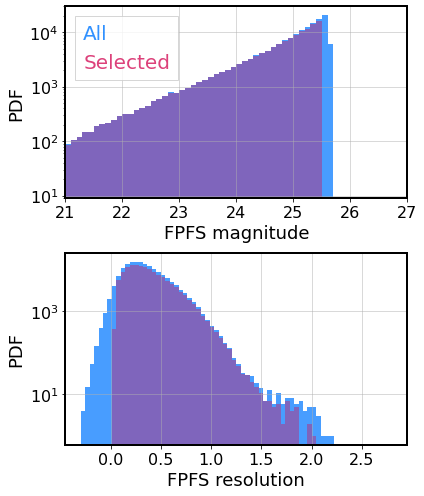

In [16]:
if False:
    pix_scale=0.168
    nbins=70
    m1   =   -2.5 * np.log10(mm1['fpfs_M00']) + 27.
    r2   =   (mm1['fpfs_M20']+mm1['fpfs_M00'])/(mm1['fpfs_M00'])
    msk=(m1<25.5)&(r2>=0.05)
    plt.close()
    fig,axes=pltutil.make_figure_axes(nx=1,ny=2,square=False)
    ax=axes[0]
    ax.hist(m1,bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(20,27),label='All',alpha=0.8,histtype='stepfilled')
    ax.hist(m1[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[2],range=(20,27),label='Selected',alpha=0.4,histtype='stepfilled')

    leg=ax.legend(loc='upper left',fontsize=20,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
    for it,text in enumerate(leg.get_texts()):
        text.set_color(pltutil.colors[it+1])
    ax.set_xlim(21,27)
    ax.set_yscale('log')
    ax.set_xlabel('FPFS magnitude')
    ax.set_ylabel('PDF')
    ax.grid()

    ax=axes[1]
    ax.hist(r2,bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(-0.3,2.8),alpha=0.8,histtype='stepfilled')
    ax.hist(r2[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[2],range=(-0.3,2.8),alpha=0.4,histtype='stepfilled')
    #ax.set_xlim(-0.3,0.8)
    ax.set_yscale('log')
    ax.set_xlabel('FPFS resolution')
    ax.set_ylabel('PDF')
    ax.grid()
    fig.tight_layout()


    gc.collect()
    fig.savefig('obsHist.pdf')

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

ver='try2'
#gver='basic2Shift'
gver='unif_cosmo170'
dver='cut32'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

In [2]:
# read noiseless data
nver='var7em3' 
mm1=[]
mm2=[]
for _i in range(0,200):
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()

9

In [3]:
gc.collect()
Const  =   20.
noirev =   True
ellM1  =   fpfs.catalog.fpfsM2E(mm1,const=Const,noirev=noirev)
ellM2  =   fpfs.catalog.fpfsM2E(mm2,const=Const,noirev=noirev)
gc.collect()

0

2334

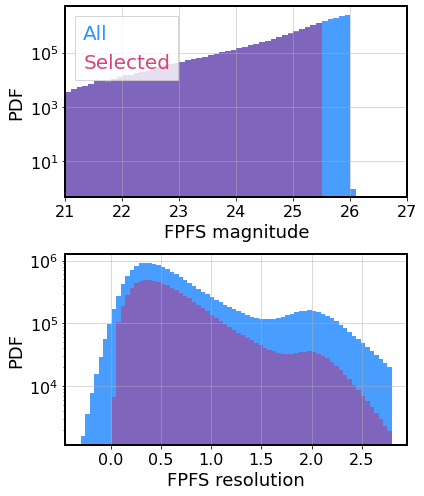

In [4]:
pix_scale=0.168
nbins=70
m1   =   -2.5 * np.log10(mm1['fpfs_M00']) + 27.
r2   =   (mm1['fpfs_M20']+mm1['fpfs_M00'])/(mm1['fpfs_M00'])
msk=(m1<25.5)&(r2>=0.05)
plt.close()
fig,axes=pltutil.make_figure_axes(nx=1,ny=2,square=False)
ax=axes[0]
ax.hist(m1,bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(20,27),label='All',alpha=0.8,histtype='stepfilled')
ax.hist(m1[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[2],range=(20,27),label='Selected',alpha=0.4,histtype='stepfilled')

leg=ax.legend(loc='upper left',fontsize=20,handlelength=0,handletextpad=0,fancybox=False,markerscale=0)
for it,text in enumerate(leg.get_texts()):
    text.set_color(pltutil.colors[it+1])
ax.set_xlim(21,27)
ax.set_yscale('log')
ax.set_xlabel('FPFS magnitude')
ax.set_ylabel('PDF')
ax.grid()

ax=axes[1]
ax.hist(r2,bins=nbins,density=False,linewidth=2.,color=pltutil.colors[1],range=(-0.3,2.8),alpha=0.8,histtype='stepfilled')
ax.hist(r2[msk],bins=nbins,density=False,linewidth=2.,color=pltutil.colors[2],range=(-0.3,2.8),alpha=0.4,histtype='stepfilled')
#ax.set_xlim(-0.3,0.8)
ax.set_yscale('log')
ax.set_xlabel('FPFS resolution')
ax.set_ylabel('PDF')
ax.grid()
fig.tight_layout()


gc.collect()
#fig.savefig('obsHist.pdf')

In [5]:
#del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.catalog.summary_stats(mm1,ellM1,use_sig)
fs2=fpfs.catalog.summary_stats(mm2,ellM2,use_sig)

selnm=['detect','R2','M00']
dcc=-0.6
cutB=25.8
cutsig=[0.08,0.2,0.4]

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,4):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    mcut=cutB+dcc*i
    cut=[0.08,0.08,10**((27-mcut)/2.5)]
    print(mcut,cut)
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+fs1.corR1+fs2.corR1)/2.
    x.append(mcut)
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)

25.8 [0.08, 0.08, 3.0199517204020143]
25.2 [0.08, 0.08, 5.24807460249773]
24.6 [0.08, 0.08, 9.120108393559086]
24.0 [0.08, 0.08, 15.848931924611133]


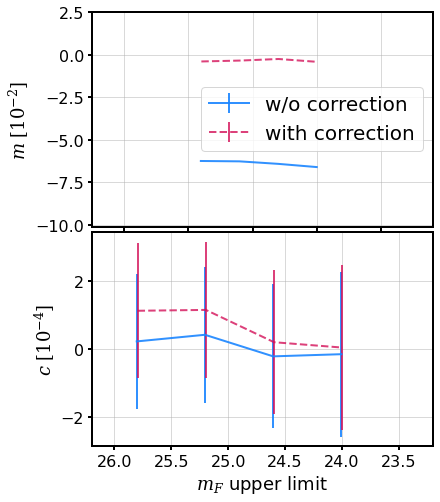

In [6]:
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$m_{F}$ upper limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.zeros(len(yerr))*1e2,label='w/o correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.zeros(len(yerr))*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(22.2,27.5)
ax.set_ylim(-10.1,2.5)
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.invert_xaxis()
ax.legend()
ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(23.2,26.2)
#ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
#cbin=(bins[1:]+bins[:-1])/2.
#sf=hist.max()/2.
#hist=hist/sf
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()
ax.invert_xaxis()

plt.tight_layout(h_pad=-0.2)

In [7]:
del fs1,fs2
gc.collect()
use_sig=False
fs1=fpfs.catalog.summary_stats(mm1,ellM1,use_sig)
fs2=fpfs.catalog.summary_stats(mm2,ellM2,use_sig)

selnm=['detect','R2','M00']
dcc=0.08
cutB=-0.02
cutsig=[0.2,0.2,0.2]

x=[]
y1=[];y2=[];yerr=[]
z1=[];z2=[];zerr=[]
for i in range(0,4):
    # clean outcome
    fs1.clear_outcomes()
    fs2.clear_outcomes()
    cut=cutB+dcc*i
    print(cut)
    cut=[cut,0.08,3.9]
    # weight array
    fs1.update_selection_weight(selnm,cut,cutsig);fs2.update_selection_weight(selnm,cut,cutsig)
    fs1.update_selection_bias(selnm,cut,cutsig);fs2.update_selection_bias(selnm,cut,cutsig)
    fs1.update_ellsum();fs2.update_ellsum()
    de   = fs2.sumE1-fs1.sumE1
    eA   = (fs1.sumE1+fs2.sumE1)/2.
    eAR  = (fs1.sumE1+fs2.sumE1+fs1.corE1+fs2.corE1)/2.
    rave = (fs1.sumR1+fs2.sumR1)/2.
    raveR= (fs1.sumR1+fs2.sumR1+fs1.corR1+fs2.corR1)/2.
    x.append(cut[0])
    y1.append(de/rave/0.04-1);y2.append(de/raveR/0.04-1)
    yerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR/0.04)
    z1.append(eA/rave);z2.append(eAR/rave)
    zerr.append(0.15*np.sqrt(np.sum((fs2.ell['fpfs_R1E']*fs2.ws)**2.))/raveR)

-0.02
0.06
0.14
0.22


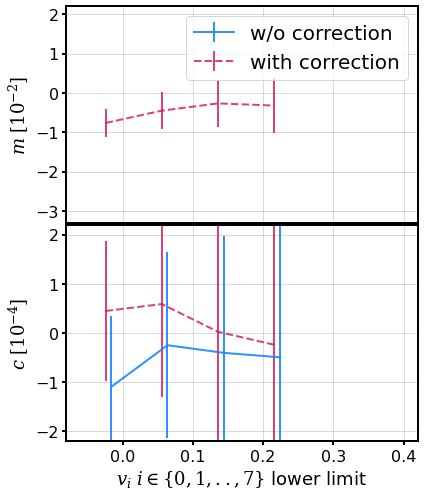

In [8]:
# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$v_{i}~ i \in \{0,1,..,7\}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='w/o correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlim(-0.08,0.42)
ax.set_ylim(-3.3,2.2)
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.legend()
ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='w/o correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.08,0.42)
ax.set_ylim(-2.2,2.2)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#hist,bins=np.histogram(fs1.mm['fpfs_M00'],range=(-0.05,0.46),bins=100,density=True)
#cbin=(bins[1:]+bins[:-1])/2.
#sf=hist.max()/2.
#hist=hist/sf
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()

plt.tight_layout(h_pad=-0.2)

(array([ 40113., 139538., 190914., 228617., 256657., 289235., 305659.,
        328355., 359843., 365479., 386018., 400704., 412183., 425905.,
        429361., 443945., 439705., 452004., 467345., 462186., 468581.,
        466326., 471381., 468394., 476812., 475672., 467150., 484951.,
        473141., 475213., 456252., 456569., 453507., 438304., 442682.,
        423820., 422231., 412847., 396439., 386714., 369347., 357954.,
        336657., 317099., 293585., 255096., 226939., 189813., 141858.,
         44893.]),
 array([ 208.  ,  299.58,  391.16,  482.74,  574.32,  665.9 ,  757.48,
         849.06,  940.64, 1032.22, 1123.8 , 1215.38, 1306.96, 1398.54,
        1490.12, 1581.7 , 1673.28, 1764.86, 1856.44, 1948.02, 2039.6 ,
        2131.18, 2222.76, 2314.34, 2405.92, 2497.5 , 2589.08, 2680.66,
        2772.24, 2863.82, 2955.4 , 3046.98, 3138.56, 3230.14, 3321.72,
        3413.3 , 3504.88, 3596.46, 3688.04, 3779.62, 3871.2 , 3962.78,
        4054.36, 4145.94, 4237.52, 4329.1 , 4420.68, 4512.

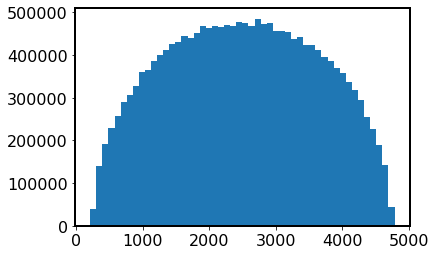

In [9]:
plt.hist(mm1['fpfs_x'],bins=50)

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
         67317., 256980., 315626., 366944., 410015., 441160., 453413.,
        453001., 444626., 431305., 418296., 402238., 379321., 346793.,
        302751., 250445., 201358., 161264., 131600., 108887.,  91858.,
         79286.,  68474.,  59521.,  52376.,  46684.,  41461.,  37658.,
         33710.,  30594.,  28052.,  25766.,  23590.,  21649.,  20286.,
         18654.,  17481.,  16092.,  14874.,  14147.,  13357.,  12562.,
         11873.]),
 array([-0.3  , -0.274, -0.248, -0.222, -0.196, -0.17 , -0.144, -0.118,
        -0.092, -0.066, -0.04 , -0.014,  0.012,  0.038,  0.064,  0.09 ,
         0.116,  0.142,  0.168,  0.194,  0.22 ,  0.246,  0.272,  0.298,
         0.324,  0.35 ,  0.376,  0.402,  0.428,  0.454,  0.48 ,  0.506,
         0.532,  0.558,  0.584,  0.61 ,  0.636,  0.662,  0.688,  0.714,
         0.74 ,  0.766,  0.792,  0.818,  0.844,  0.87 ,  0.896,  0.922,
         0.948,  0.974,  1.   ]),
 <BarContainer obj

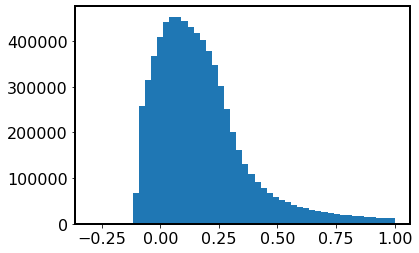

In [10]:
msk=(mm1['fpfs_v3']>-0.1)&(mm1['fpfs_v1']>-0.1)&(mm1['fpfs_v5']>-0.1)&(mm1['fpfs_v7']>-0.1)
msk=msk&(mm1['fpfs_v0']>-0.1)&(mm1['fpfs_v2']>-0.1)&(mm1['fpfs_v3']>-0.1)&(mm1['fpfs_v6']>-0.1)
plt.hist(mm1['fpfs_v1'][msk],range=(-0.3,1),bins=50)

In [51]:
ver='try2'
#gver='basic2Shift'
gver='unif_cosmo170'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')
# read noiseless data
nver='var7em3' 
mm1=[]
mm2=[]
for _i in range(0,20):
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()

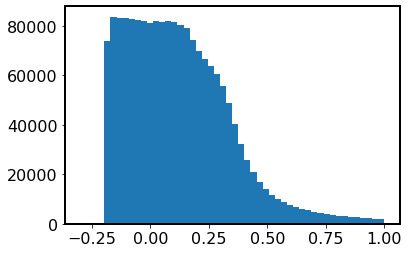

In [52]:
_=plt.hist(mm1['fpfs_v0'],range=(-0.3,1),bins=50)

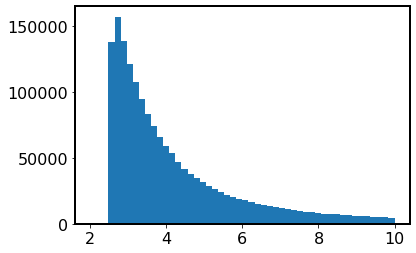

In [55]:
_=plt.hist(mm1['fpfs_M00'],range=(2.,10.),bins=50)